In [10]:
import chess

In [27]:
board = chess.Board()

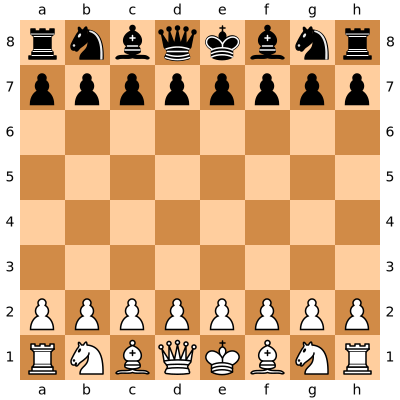

In [19]:
board

In [20]:
board.legal_moves

<LegalMoveGenerator at 0x210441f5320 (Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4)>

In [21]:
move = list(board.legal_moves)[0]

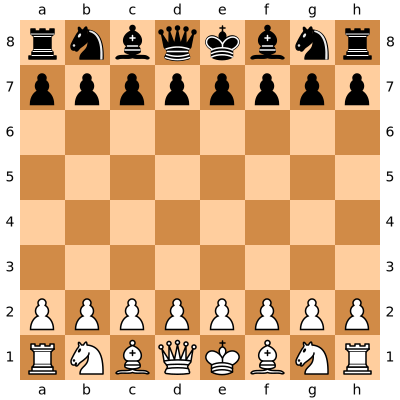

In [15]:
board

In [22]:
import random
def random_play(board):
    move = random.choice(list(board.legal_moves))
    board.push(move)

In [23]:
random_play(board)

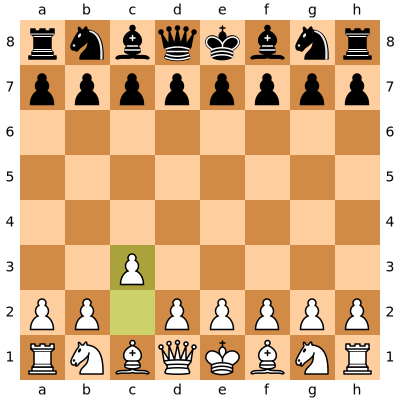

In [24]:
board

In [159]:
import time
from IPython.display import clear_output, display

board = chess.Board()

def play_game(player1, player2):
    while not board.is_game_over(claim_draw=True):
        if board.turn == chess.WHITE:
            player1(board)
        else:
            player2(board)
        clear_output(wait=True)
        display(board)
        time.sleep(0.5)

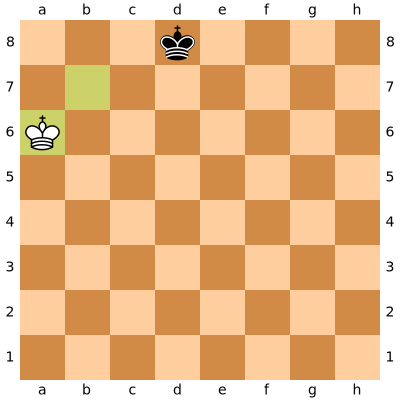

In [36]:
play_game(random_play, random_play)

In [112]:
def human_play(board):
    while True:
        move = input("Input Your Move:")
        if move == "q":
            raise KeyboardInterrupt
        try:
            board.push_san(move)
            break 
        except Exception as e:
            print(e)

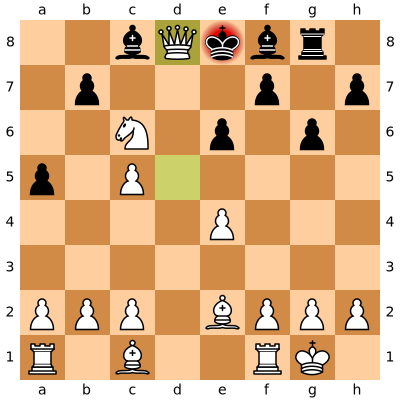

In [54]:
play_game(human_play, random_play)

In [146]:
def basic_evaluate(board):
    
    piece_values = [
        (chess.PAWN, 1),
        (chess.BISHOP, 4),
        (chess.KNIGHT, 3),
        (chess.ROOK, 5),
        (chess.QUEEN, 9),
        (chess.KING, 0)
    ]
    
    score = random.random()
    
    for piece, value in piece_values:
        score += value * len(board.pieces(piece, not board.turn))
        score -= value * len(board.pieces(piece, board.turn))

    if board.is_checkmate():
        score += 100
        
    return score

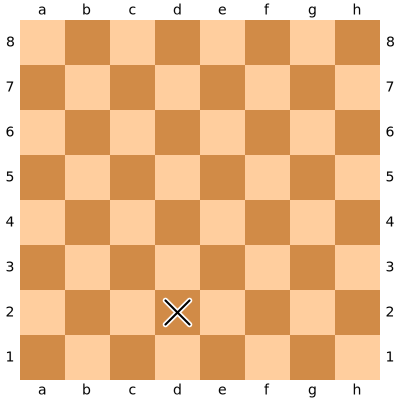

In [113]:
board.pieces(chess.ROOK, chess.WHITE)

In [125]:
def ok_player(board):
    moves = list(board.legal_moves)
    best_move = moves[0]
    best_move_score = basic_evaluate(board, moves[0])
    
    for move in moves[1:]:
        new_board = board.copy()
        score = basic_evaluate(new_board, move)
        if score > best_move_score:
            best_move_score = score
            best_move = move
        print(move, score)
    
    print(best_move_score)
    input()
    board.push(best_move)

In [128]:
board = chess.Board(chess.STARTING_FEN)

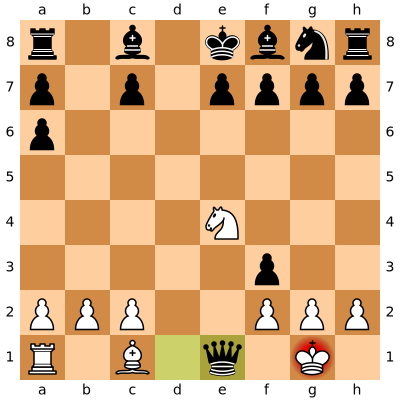

In [129]:
play_game(human_play, ok_player)

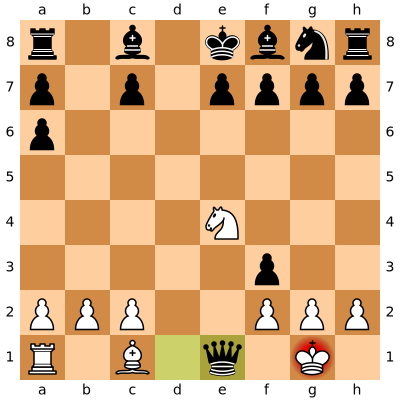

In [130]:
board


In [177]:
def minimax(board, depth, isMaxPlayer, isTop=False):
    best_move = None
    best_move_score = float('inf') if isMaxPlayer else float('-inf')
    if depth == 0:
        return -basic_evaluate(board)
    if isMaxPlayer:
        for move in board.legal_moves:
            board.push(move)
            result = minimax(board, depth - 1, not isMaxPlayer)
            if result < best_move_score:
                best_move = move
                best_move_score = result
            board.pop()
    else:
        for move in board.legal_moves:
            board.push(move)
            result = minimax(board, depth - 1, not isMaxPlayer)
            if result > best_move_score:
                best_move = move
                best_move_score = result
            board.pop()
    if isTop:
        print(best_move)
        return best_move
    return best_move_score

In [180]:
def minimax_play(board):
    board.push(minimax(board, 5, False, True))

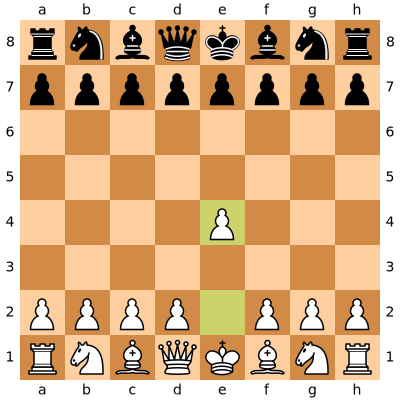

KeyboardInterrupt: 

In [181]:
board = chess.Board()
play_game(human_play, minimax_play)